#RandomForestRegression

In linear regressin I am facing one issue where I am not able to perform hot encoding I am facing some error where So I tried for any other method to perform modelling along with converting categorical variables. I noticed they are using highly correlated columns to establish the relation.So i tried that method for this model

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
data.head()
data=data.drop('Id',axis=1)


In [33]:
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().sum()>100]
data = data.drop(cols_with_missing, axis=1)
data.shape

(1460, 74)

In [0]:
for col in data.columns:
  if data[col].isnull().any():
    data[col].fillna(data[col].mode()[0],inplace=True)


In [35]:
df_train=data
X=df_train.drop('SalePrice',axis=1)
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [0]:
y=data['SalePrice']


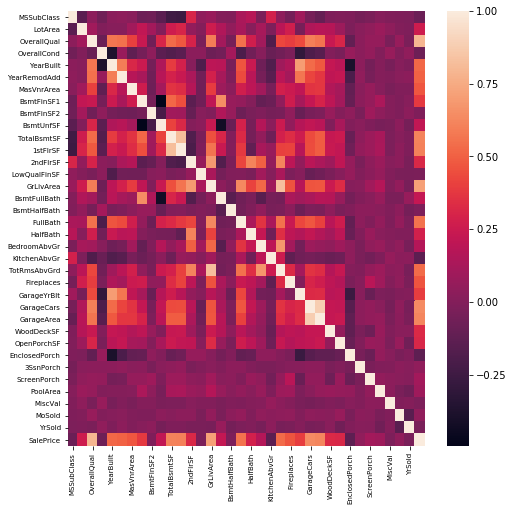

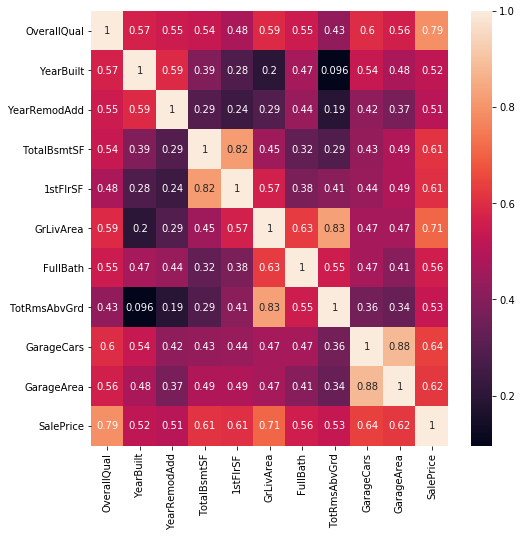

In [37]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.yticks(rotation=0, size=7)
plt.xticks(rotation=90, size=7)
plt.show()
# Select columns with a correlation > 0.5
rel_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)

corr2 = data[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [0]:
X = data[rel_cols[:-1]].iloc[:,0:].values
y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)




In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9099614022329171

In [40]:
regressor = RandomForestRegressor(n_estimators=600, n_jobs=-1, oob_score=True, min_samples_leaf = 2,max_features = 0.5)
regressor.fit(X_train,y_train)
regressor.score(X_test, y_test)

0.8880916854026455

#DecisiontreeRegression

In [42]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
nr_cv = 5
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1)
grid_dtree.fit(X_train, y_train)
grid_dtree.score(X_test, y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.2s finished


0.8470187990872814